<a href="https://colab.research.google.com/github/parth2102/CE888-7-SP-Data-Science-and-Decision-Making/blob/main/Labs/lab5/lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import matplotlib
import numpy as np
from sklearn.datasets import load_wine
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder

In [2]:
data = load_wine(as_frame=True)
df = data.data.copy()  
df['y'] = data.target 
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,y
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [3]:
df['alcohol'].corr(df['ash'])

0.21154459643174453

In [9]:
row = len(df)
column = len(df.columns) - 1
print('number of samples:', row, 'number of features:', column)
df['y'].value_counts()

number of samples: 178 number of features: 13


1    71
0    59
2    48
Name: y, dtype: int64

In [4]:
df['alcohol'].mean(axis=0)

13.000617977528083

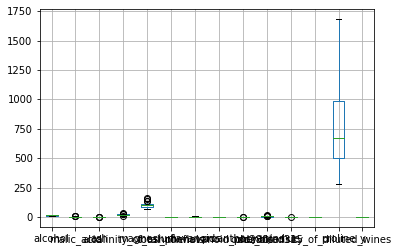

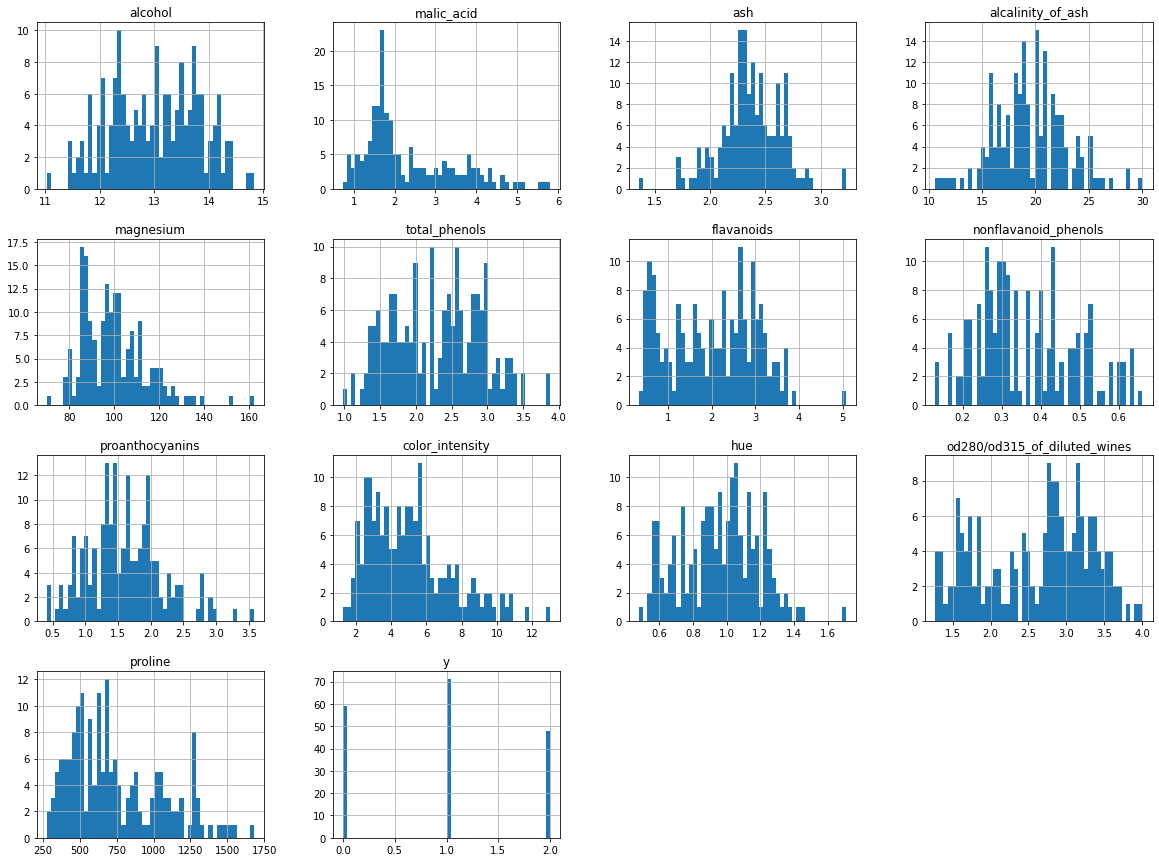

In [8]:
column = list(df.columns)
boxplot = df.boxplot(column= column)
_ = df.hist(bins=50, figsize=(20,15))

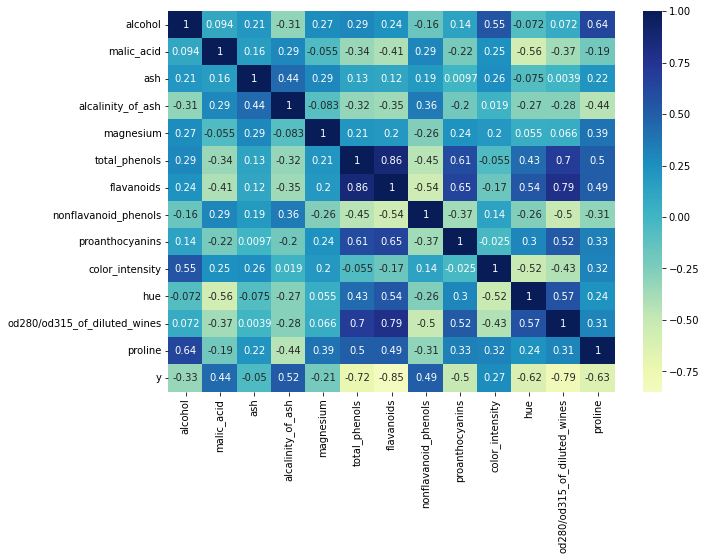

In [10]:
correlations = df.corr()
correlations_no_output = correlations.drop(labels = 'y', axis = 0)
correlations_no_output = correlations.drop(labels = 'y', axis = 1)
f, ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(correlations_no_output, annot=True, center=0,  cmap="YlGnBu")

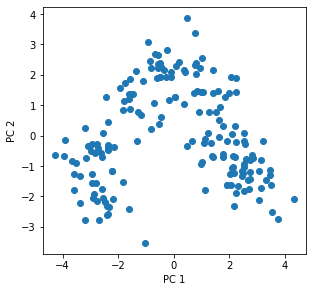

In [12]:
plt.figure(figsize=(16,10))
for i in range(1,2):
    plt.subplot(2, 3, i)
    plt.scatter(x_pca_n[:, i-1], x_pca_n[:, i])
    plt.xlabel('PC %d' % i)
    plt.ylabel('PC %d' % (i+1))
plt.savefig('students_pca_pcs.pdf', dpi=300)
plt.show()

In [11]:
df_x = df.drop('y', axis=1)
num_features = list(df_x.columns)
colTransformer = ColumnTransformer([('num', StandardScaler(), num_features)], remainder='passthrough')
x_processed = colTransformer.fit_transform(df_x)
print(x_processed.shape)
pca_n = PCA(n_components=2)
x_pca_n = pca_n.fit_transform(x_processed)
np.cumsum(pca_n.explained_variance_ratio_)

(178, 13)


array([0.36198848, 0.55406338])

In [15]:
pca_n = PCA(n_components=3)
x_pca_n = pca_n.fit_transform(x_processed)
np.cumsum(pca_n.explained_variance_ratio_)

array([0.36198848, 0.55406338, 0.66529969])

In [14]:
pca_n = PCA(n_components=0.85)
x_pca_n = pca_n.fit_transform(x_processed)
np.cumsum(pca_n.explained_variance_ratio_)

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116])

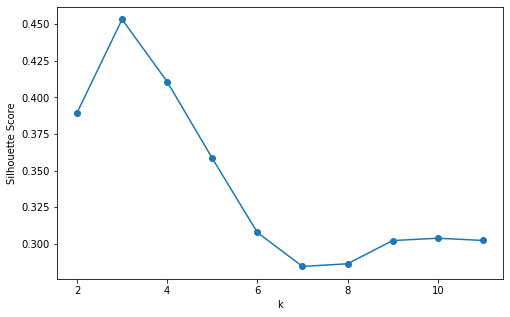

In [17]:
plt.figure(figsize=(8,5))
plt.plot(range(2, 12), sil, 'o-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.savefig('elbow_moons_sil.pdf', dpi=300)
plt.show()

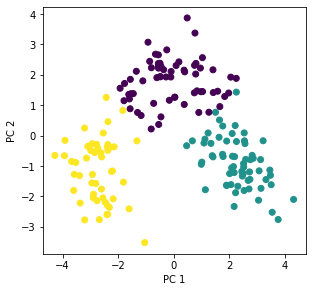

In [18]:
kmean = KMeans(n_clusters=3)
kmean.fit(x_pca_n)

plt.figure(figsize=(16,10))
for i in range(1, 2):
    plt.subplot(2, 3, i)
    plt.scatter(x_pca_n[:, i-1], x_pca_n[:, i], c=kmean.labels_)
    plt.xlabel('PC %d' % i)
    plt.ylabel('PC %d' % (i+1))
plt.savefig('students_pca_clusters_kmeans=2.pdf', dpi=300)
plt.show()

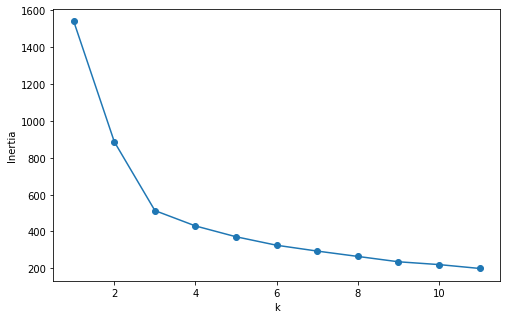

In [16]:
inertias, sil = [], []
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    y_pred = kmeans.fit_predict(x_pca_n)
    inertias.append(kmeans.inertia_)
    if k > 1:
        sil.append(silhouette_score(x_pca_n, y_pred))

plt.figure(figsize=(8,5))
plt.plot(range(1, 12), inertias, 'o-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.savefig('elbow_moons.pdf', dpi=300)
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

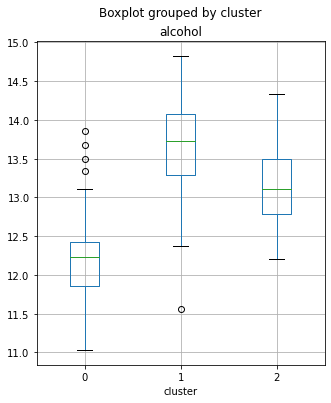

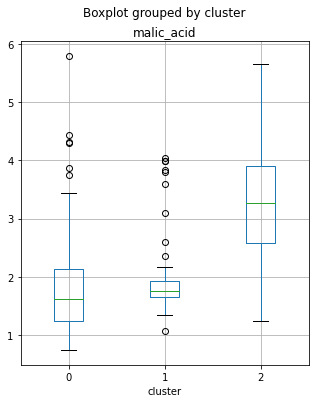

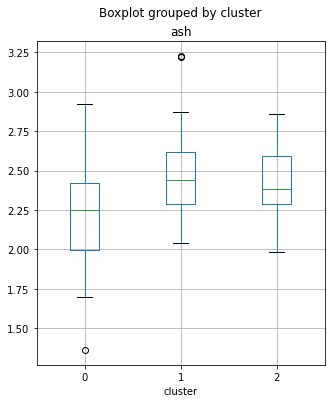

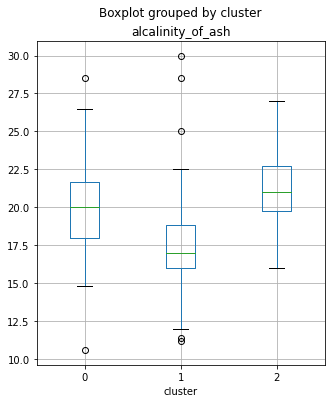

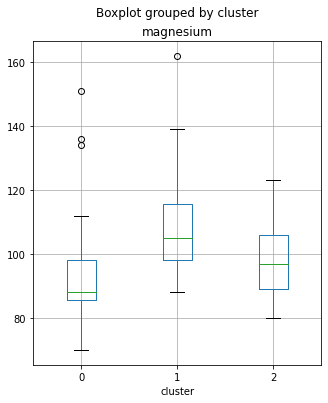

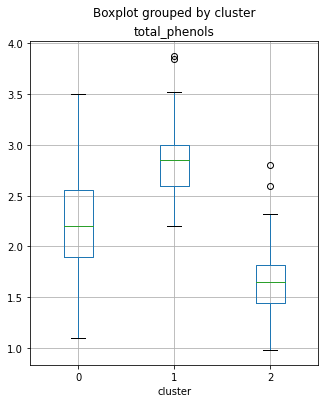

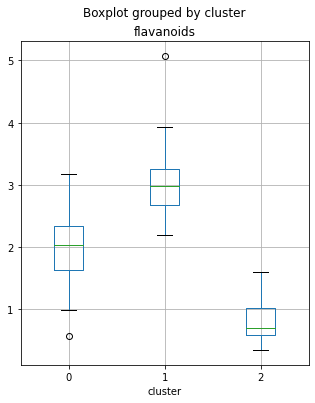

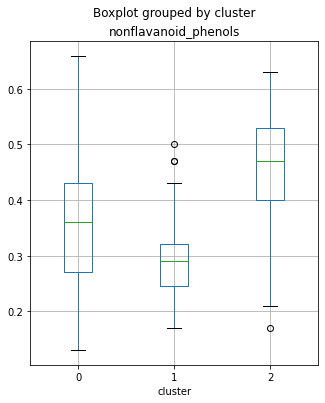

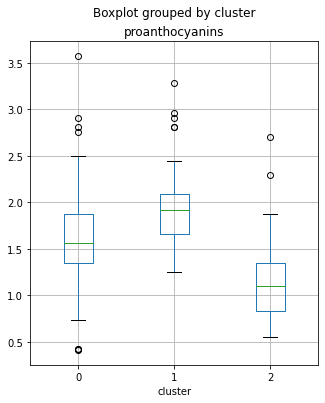

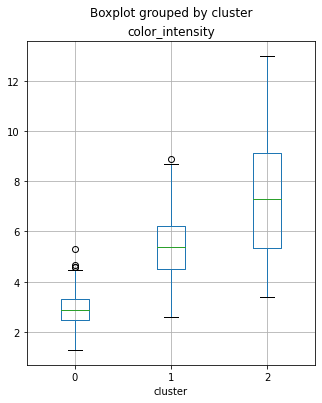

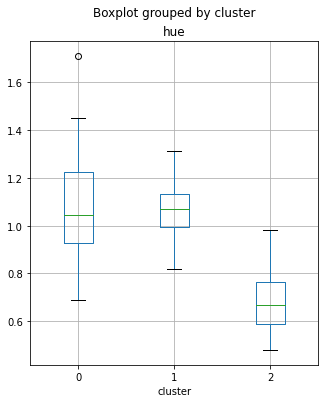

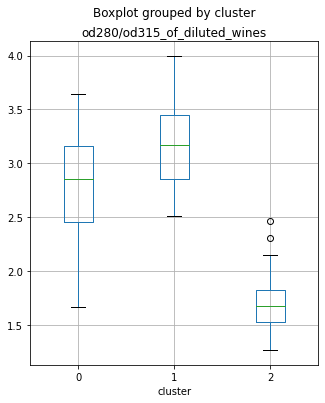

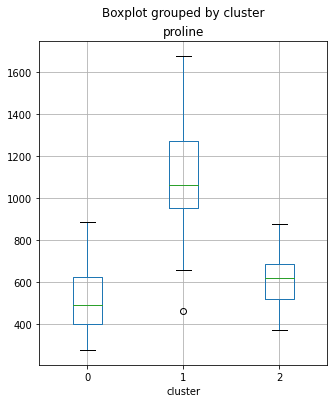

In [21]:
original = data.data.copy()
original['cluster'] = kmean.labels_
column = list(original.columns)
column.remove('cluster')
for i in column:
  boxplot = original.boxplot(column = i, by='cluster', figsize = (5,6))